In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dbdreader import DBD, MultiDBD, DBDPatternSelect
import gsw
import seawater
import cmocean


import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output

# Big

In [2]:
narrow_data = pd.read_csv("unit_1094_2023-340-4-2_to_2023-342-1-8_[de]bd_narrow.csv")
narrow_data["date_time"] = pd.to_datetime(narrow_data["date_time"])

In [3]:
def pivot_data(data:pd.DataFrame):
    data = data.reset_index()
    return data.pivot(index="date_time", columns="variable", values="value")

In [ ]:
wide = pivot_data(data=narrow_data)

In [ ]:
narrow_data.drop_duplicates().pivot(index="date_time", columns="variable", values="value")

In [26]:
index = narrow_data.drop_duplicates(keep=False).index


In [37]:
narrow_data[narrow_data.duplicated(keep=False)]

,date_time,time,data_type,variable,value
1,2023-12-07 07:50:07.884999936,1.701935e+09,engineering,sci_rbrctd_temperature_00,0.0000
6,2023-12-07 07:50:07.884999936,1.701935e+09,engineering,sci_rbrctd_temperature_00,0.0000
685,2023-12-07 08:06:36.884999936,1.701936e+09,engineering,sci_rbrctd_temperature_00,23.5330
686,2023-12-07 08:06:36.884999936,1.701936e+09,engineering,sci_rbrctd_temperature_00,23.5330
699,2023-12-07 08:06:37.884999936,1.701936e+09,engineering,sci_rbrctd_temperature_00,23.5329
...,...,...,...,...,...
3269094,2023-12-13 11:47:34.260000000,1.702468e+09,engineering,sci_rbrctd_temperature_00,23.4328
3269098,2023-12-13 11:47:35.260000000,1.702468e+09,engineering,sci_rbrctd_temperature_00,23.4320
3269101,2023-12-13 11:47:35.260000000,1.702468e+09,engineering,sci_rbrctd_temperature_00,23.4320
3269106,2023-12-13 11:47:36.260000000,1.702468e+09,engineering,sci_rbrctd_temperature_00,23.4281


In [41]:
if (narrow_data.shape[0] - narrow_data.drop_duplicates().shape[0]) == narrow_data[narrow_data.duplicated()].shape[0]:
    print("yeah")

yeah


In [40]:
narrow_data.shape[0] - narrow_data.drop_duplicates().shape[0]

448820

In [35]:
narrow_data.head(20)

,date_time,time,data_type,variable,value
0,2023-12-07 07:50:07.884999936,1.701935e+09,engineering,sci_seaowl_fdom_scaled,0.0000
1,2023-12-07 07:50:07.884999936,1.701935e+09,engineering,sci_rbrctd_temperature_00,0.0000
2,2023-12-07 07:50:07.884999936,1.701935e+09,engineering,sci_rbrctd_salinity_00,0.0000
3,2023-12-07 07:50:07.884999936,1.701935e+09,engineering,sci_seaowl_chl_scaled,0.0000
4,2023-12-07 07:50:07.884999936,1.701935e+09,engineering,sci_oxy4_oxygen,0.0000
5,2023-12-07 07:50:07.884999936,1.701935e+09,engineering,sci_seaowl_bb_scaled,0.0000
6,2023-12-07 07:50:07.884999936,1.701935e+09,engineering,sci_rbrctd_temperature_00,0.0000
7,2023-12-07 07:50:11.072000000,1.701935e+09,engineering,m_lon,-42.0985
8,2023-12-07 07:50:11.072000000,1.701935e+09,engineering,m_lat,-23.1008
9,2023-12-07 07:50:11.072000000,1.701935e+09,engineering,m_depth,0.0000


In [13]:
narrow_data.drop_duplicates().shape

(2820385, 5)

In [8]:
narrow_data.shape

(3269205, 5)

In [9]:
narrow_data.head()

,date_time,time,data_type,variable,value
0,2023-12-07 07:50:07.884999936,1.701935e+09,engineering,sci_seaowl_fdom_scaled,0.0
1,2023-12-07 07:50:07.884999936,1.701935e+09,engineering,sci_rbrctd_temperature_00,0.0
2,2023-12-07 07:50:07.884999936,1.701935e+09,engineering,sci_rbrctd_salinity_00,0.0
3,2023-12-07 07:50:07.884999936,1.701935e+09,engineering,sci_seaowl_chl_scaled,0.0
4,2023-12-07 07:50:07.884999936,1.701935e+09,engineering,sci_oxy4_oxygen,0.0


In [4]:
narrow_data[narrow_data["variable"] == "sci_rbrctd_temperature_00"].dropna(subset=["value"])

,date_time,time,data_type,variable,value
1,2023-12-07 07:50:07.884999936,1.701935e+09,engineering,sci_rbrctd_temperature_00,0.0000
6,2023-12-07 07:50:07.884999936,1.701935e+09,engineering,sci_rbrctd_temperature_00,0.0000
685,2023-12-07 08:06:36.884999936,1.701936e+09,engineering,sci_rbrctd_temperature_00,23.5330
686,2023-12-07 08:06:36.884999936,1.701936e+09,engineering,sci_rbrctd_temperature_00,23.5330
699,2023-12-07 08:06:37.884999936,1.701936e+09,engineering,sci_rbrctd_temperature_00,23.5329
...,...,...,...,...,...
3269094,2023-12-13 11:47:34.260000000,1.702468e+09,engineering,sci_rbrctd_temperature_00,23.4328
3269098,2023-12-13 11:47:35.260000000,1.702468e+09,engineering,sci_rbrctd_temperature_00,23.4320
3269101,2023-12-13 11:47:35.260000000,1.702468e+09,engineering,sci_rbrctd_temperature_00,23.4320
3269106,2023-12-13 11:47:36.260000000,1.702468e+09,engineering,sci_rbrctd_temperature_00,23.4281


In [5]:
data = narrow_data.drop_duplicates().pivot(index="date_time", columns="variable", values="value")


## Remove outliers

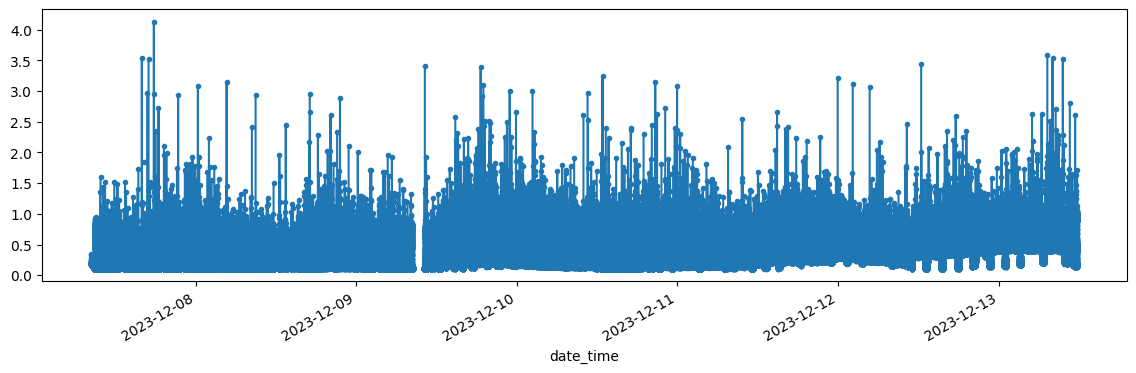

In [12]:
data["sci_seaowl_chl_scaled"].plot(marker=".", figsize=(14,4));

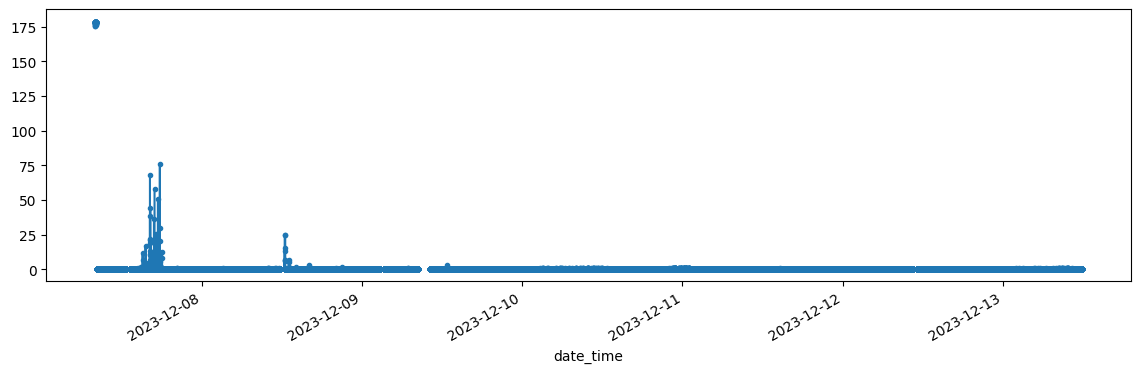

In [13]:
data["sci_seaowl_fdom_scaled"].plot(marker=".", figsize=(14,4));

In [8]:
sci_params = ["sci_rbrctd_temperature_00", "sci_oxy4_oxygen",
                                "sci_rbrctd_temperature_00","sci_rbrctd_salinity_00","sci_seaowl_chl_scaled",
                                "sci_seaowl_fdom_scaled"]

In [9]:
for param in sci_params:
    data.loc[data[param]<0.1, param] = np.nan

In [10]:
data.loc[data["sci_rbrctd_salinity_00"]<34.0, "sci_rbrctd_salinity_00"] = np.nan

In [11]:
data.loc[data["sci_seaowl_chl_scaled"]>10, "sci_seaowl_chl_scaled"] = np.nan

In [14]:
data.loc[data["sci_seaowl_fdom_scaled"]>100, "sci_seaowl_fdom_scaled"] = np.nan

## Calculate salinity

cond unit = S/m = (mS*1000)/(cm/100) = mS*10/cm = 10*S/m

In [27]:
data["sci_water_salinity"] = gsw.SP_from_C(C=data["sci_water_cond"]*10, t=data["sci_water_temp"], p=data["sci_water_pressure"])

KeyError: 'sci_water_cond'

## Interpolando

In [20]:
sel_params = ["m_depth", "m_lat", "m_lon", "sci_rbrctd_temperature_00","sci_rbrctd_salinity_00", "sci_oxy4_oxygen","sci_seaowl_fdom_scaled","sci_seaowl_bb_scaled","sci_seaowl_chl_scaled"]
data_interp = data[sel_params].copy()

In [21]:
for param in sel_params:
    data_interp[f"{param}_interp"] = data_interp[param].interpolate(method="time", limit_direction='both')


## Calculate Density

In [22]:
data_interp["sci_water_density_interp"] = seawater.dens0(data_interp["sci_rbrctd_temperature_00_interp"], data_interp["sci_rbrctd_salinity_00_interp"])

## Save Big Data

In [23]:
data_interp.to_csv("data_interp_big.csv")

# Small

## Import data

In [3]:
data = pd.read_csv("unit_1094_2023-340-4-3_to_2023-340-4-5_[st]bd_wide.csv")
data["date_time"] = pd.to_datetime(data["date_time"])
data = data.set_index("date_time")

narrow_data = pd.read_csv("unit_1094_2023-340-4-3_to_2023-340-4-5_[st]bd_narrow.csv")

In [4]:
data.sort_index()

,c_ballast_pumped,c_battpos,c_climb_bpump,c_de_oil_vol,c_dive_bpump,c_fin,c_pitch,c_wpt_lat,c_wpt_lon,m_altitude,...,m_water_vx,m_water_vy,sci_m_present_secs_into_mission,sci_m_present_time,sci_oxy4_oxygen,sci_seaowl_fdom_scaled,sci_water_cond,sci_water_pressure,sci_water_temp,x_surface_active
date_time,,,,,,,,,,,,,,,,,,,,,
2023-12-07 07:50:11.072000000,420.0,NaN,1000.0,420.0,-1000.0,NaN,NaN,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-07 07:50:29.267000064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-07 07:50:41.538000128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-07 07:50:45.638000128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-07 07:51:02.000999936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-10 15:03:54.118000128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-10 15:04:06.124999936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-10 15:04:10.134000128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.columns

Index(['c_ballast_pumped', 'c_battpos', 'c_climb_bpump', 'c_de_oil_vol',
       'c_dive_bpump', 'c_fin', 'c_pitch', 'c_wpt_lat', 'c_wpt_lon',
       'm_altitude', 'm_argos_is_xmitting', 'm_argos_on', 'm_avg_depth_rate',
       'm_ballast_pumped', 'm_battery', 'm_battpos', 'm_coulomb_amphr_total',
       'm_coulomb_current', 'm_de_oil_vol', 'm_depth',
       'm_digifin_leakdetect_reading', 'm_fin', 'm_gps_lat', 'm_gps_lon',
       'm_heading', 'm_iridium_on', 'm_iridium_status', 'm_lat',
       'm_leakdetect_voltage', 'm_leakdetect_voltage_forward', 'm_lon',
       'm_pitch', 'm_present_secs_into_mission', 'm_present_time',
       'm_raw_altitude', 'm_roll', 'm_vacuum', 'm_veh_temp', 'm_water_depth',
       'm_water_vx', 'm_water_vy', 'sci_m_present_secs_into_mission',
       'sci_m_present_time', 'sci_oxy4_oxygen', 'sci_seaowl_fdom_scaled',
       'sci_water_cond', 'sci_water_pressure', 'sci_water_temp',
       'x_surface_active'],
      dtype='object')

In [6]:
params = ['m_depth', 'm_lat', 'm_lon', 'sci_oxy4_oxygen', 'sci_seaowl_fdom_scaled','sci_water_cond', 'sci_water_pressure', 'sci_water_temp']

## Remove outliers

In [7]:
sci_params = ['sci_oxy4_oxygen', 'sci_seaowl_fdom_scaled','sci_water_cond', 'sci_water_pressure', 'sci_water_temp']

In [8]:
for param in sci_params:
    data.loc[data[param]<0.1, param] = np.nan

## Calculate salinity

cond unit = S/m = (mS*1000)/(cm/100) = mS*10/cm = 10*S/m

In [9]:
data["sci_water_salinity"] = gsw.SP_from_C(C=data["sci_water_cond"]*10, t=data["sci_water_temp"], p=data["sci_water_pressure"])

<Axes: xlabel='date_time'>

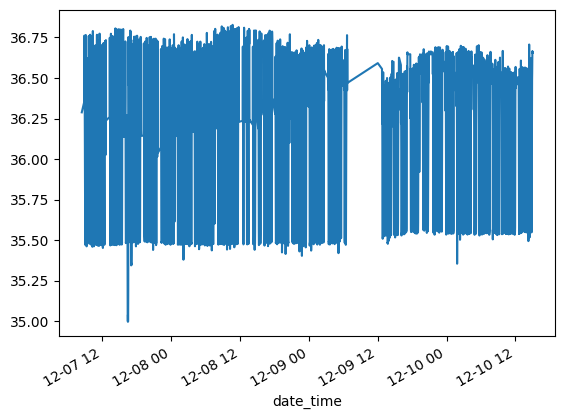

In [10]:
data["sci_water_salinity"].dropna().plot()

## Calculate Density

In [11]:
data["sci_water_density"] = seawater.dens0(data["sci_water_salinity"], data["sci_water_temp"])

## Interpolando

In [13]:
sel_params = ["m_depth", "m_lat", "m_lon", "sci_water_temp","sci_water_salinity", "sci_water_density"]
data_interp = data[sel_params].copy()

In [14]:
for param in sel_params:
    data_interp[f"{param}_interp"] = data_interp[param].interpolate(method="time", limit_direction='both')


In [15]:
data_interp.to_csv("data_interp_big.csv")

In [40]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px


app = dash.Dash(__name__, suppress_callback_exceptions=True)

app.layout = html.Div(
    children=[
        dcc.Graph(id='map-plot'),
        html.Div([
            html.H6("Parâmetro:", style={'fontSize': 15, 'fontWeight': 'bold', 'color': 'white', 'fontFamily': 'Arial, sans-serif','marginBottom': 10}),  # Customize title
            dcc.Dropdown(
                id='parameter-dropdown',
                options=[
                    {'label': 'Temperatura', 'value': 'sci_water_temp_interp'},
                    {'label': 'Salinidade', 'value': 'sci_water_salinity_interp'}
                ],
                value='sci_water_temp_interp',
                style={'fontSize': 12,'fontFamily': 'Arial, sans-serif', 'color': 'black', 'width': '80%'}

            ),
        
            html.H6("Profundidade (m):", style={'fontSize': 15, 'fontWeight': 'bold', 'color': 'white', 'fontFamily': 'Arial, sans-serif','marginBottom': 10}),  # Customize title

            dcc.Slider(
                id='depth-slider',
                min=data_interp['m_depth_interp'].min(),
                max=data_interp['m_depth_interp'].max(),
                step=1,
                marks=None,
                value=0,
                tooltip={'placement': 'bottom', 'always_visible': True},
            ),
            
            
           
        ],
        style={'position': 'absolute', 'top': '7%', 'left': '8%', 'width': '20%'}
        ),
    ],
    style={'backgroundColor': '#111111', 'color': '#7FDBFF'}
)

@app.callback(
    Output('map-plot', 'figure'),
    [Input('depth-slider', 'value'),
     Input('parameter-dropdown', 'value')]
)
def update_plot(depth, selected_parameter):
    data_sel = data_interp[(data_interp["m_depth_interp"] >= depth - 0.1) & (data_interp["m_depth_interp"] <= depth + 0.2)].copy()

    fig = px.scatter_mapbox(
        data_sel,
        lat="m_lat_interp",
        lon="m_lon_interp",
        color=selected_parameter,
        color_continuous_scale=get_colormap(selected_parameter),
        range_color=[data_interp[selected_parameter].min(), data_interp[selected_parameter].max()],
        size=selected_parameter,
        size_max=10,
        opacity=0.7,
        hover_name=selected_parameter,
        hover_data=["m_depth_interp"],
        mapbox_style="white-bg",
        zoom=8.5,
        center={"lat": -23.0889, "lon": -42.3318}
    )

    fig.update_layout(
        mapbox_layers=[
            {
                "below": 'traces',
                "sourcetype": "raster",
                "sourceattribution": 'Esri World Imagery',
                "source": [
                    'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}'
                ]
            }
        ],
        width=1000,
        height=700,
        title=f'Dados Comissão Ressurgência VI',
        coloraxis_colorbar=dict(
            x=0.5,
            y=0,
            len=0.5,
            outlinewidth=1,
            orientation='h',
            tickmode='array',
            tickvals=np.arange(0, 101, get_colorbar_step(selected_parameter)),
            ticktext=list(map(str, np.round(np.arange(0, 101, get_colorbar_step(selected_parameter)),2))),
            tickfont=dict(color='white'),
            thickness=10,
            title=dict(text=get_colorbar_title(selected_parameter), font=dict(color='white', size=12), side='top')
        )
    )

    return fig

def get_colormap(parameter):
    if parameter == 'sci_water_temp_interp':
        return 'thermal'
    elif parameter == 'sci_water_salinity_interp':
        return 'haline'

def get_colorbar_title(parameter):
    if parameter == 'sci_water_temp_interp':
        return 'Temperatura (°C)'
    elif parameter == 'sci_water_salinity_interp':
        return 'Salinidade (psu)'

def get_colorbar_step(parameter):
    if parameter == 'sci_water_temp_interp':
        return 2
    elif parameter == 'sci_water_salinity_interp':
        return 0.2

if __name__ == '__main__':
    app.run_server(debug=True)


